In [9]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

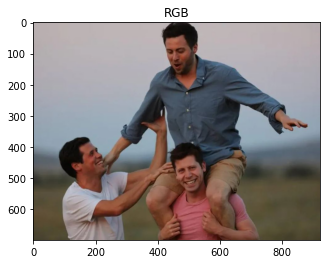

In [10]:
img = cv2.imread("sam.jpg", cv2.IMREAD_UNCHANGED)
img.shape
bgr_image = img[...,0:3]
alpha_image = img[...,-1]
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image); plt.title("RGB");

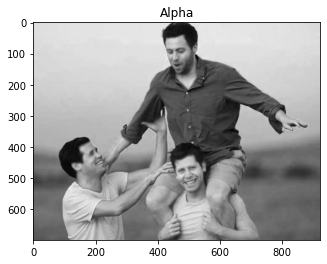

In [11]:
plt.imshow(alpha_image, cmap='gray'); plt.title("Alpha");

In [12]:

# image = cv2.imread('./images/input.jpg')
cropped = alpha_image[100:600 , 150:650]


circle = np.zeros((500,500,3), np.uint8)
cv2.circle(circle, (250, 250), 250, (255,255,255), -1) 


output_image = cv2.bitwise_and(cropped, circle)
plt.imshow(output_image[...,::-1])

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:214: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'cv::binary_op'


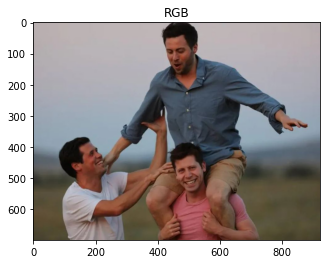

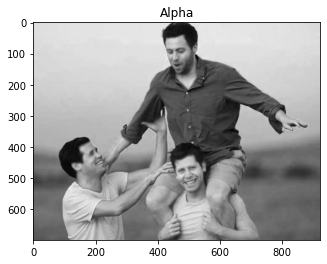

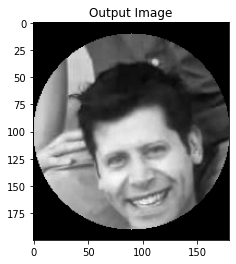

In [41]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("sam.jpg", cv2.IMREAD_UNCHANGED)
bgr_image = img[...,0:3]
alpha_image = img[...,-1]
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)
plt.title("RGB")
plt.show()
plt.imshow(alpha_image, cmap='gray')
plt.title("Alpha")
plt.show()

cropped = alpha_image[350:550, 400:580]
# Create same dimensions as the cropped image for removing manipulation of centr & radius (despite of master!!)
circle = np.zeros(cropped.shape, np.uint8)
circle_center = (cropped.shape[1] // 2, cropped.shape[0] // 2)  # Center of the cropped image
circle_radius = min(cropped.shape[0] // 2, cropped.shape[1] // 2)  # Radius to fit within the cropped image
cv2.circle(circle, circle_center, circle_radius, (255, 255, 255), -1)  # Adjust the circle position and radius

# Resize the circle to match the dimensions of the cropped image for fixing previous error
resized_circle = cv2.resize(circle, (cropped.shape[1], cropped.shape[0]))
output_image = cv2.bitwise_and(cropped, resized_circle)

plt.imshow(output_image, cmap='gray')
plt.title("Output Image")
plt.show()

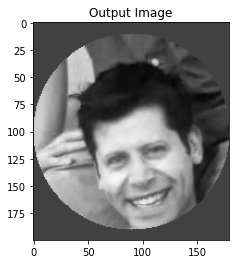

In [43]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("sam.jpg", cv2.IMREAD_UNCHANGED)

# Extract the BGR channels and alpha channel AND crop the alpha image
bgr_image = img[...,0:3]
alpha_image = img[...,-1]
cropped = alpha_image[350:550, 400:580]

# Create a circle with the same dimensions as the cropped image(for better readability and consistency and remove previous problem! centr va r dasti!)
circle = np.zeros(cropped.shape, np.uint8)
circle_center = (cropped.shape[1] // 2, cropped.shape[0] // 2)
circle_radius = min(cropped.shape[0] // 2, cropped.shape[1] // 2)
cv2.circle(circle, circle_center, circle_radius, (255, 255, 255), -1)
# Resize the circle to match the dimensions of the cropped image (remove first error !)
resized_circle = cv2.resize(circle, (cropped.shape[1], cropped.shape[0]))

output_image = cv2.bitwise_and(cropped, resized_circle)
output_image[output_image == 0] = 51  # Alpha value of 0.2 (51/255)

cv2.imwrite("alpha_cropping_Sam.png", output_image)

plt.imshow(output_image, cmap='gray')
plt.title("Output Image")
plt.show()

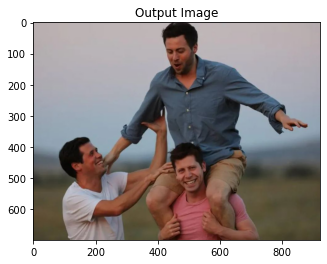

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread("sam.jpg", cv2.IMREAD_UNCHANGED)

# Extract the BGR channels and alpha channel
bgr_image = img[...,0:3]
alpha_image = img[...,-1]

# Create a white filled circle with the same dimensions as the alpha channel
circle = np.zeros(alpha_image.shape, np.uint8)
circle_center = (alpha_image.shape[1] // 2, alpha_image.shape[0] // 2)  # Center of the image
circle_radius = min(alpha_image.shape[0] // 2, alpha_image.shape[1] // 2)  # Radius to fit within the image
cv2.circle(circle, circle_center, circle_radius, (255, 255, 255), -1)  # Draw the circle

# Set alpha value for the non-circle area
alpha_image[alpha_image == 0] = 51  # Alpha value of 0.2 (51/255) for non-circle area

# Combine the circle and alpha image
output_image = cv2.merge((bgr_image, alpha_image))

# Save the output image with transparency
cv2.imwrite("output.png", output_image)

# Display the output image
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title("Output Image")
plt.show()